___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

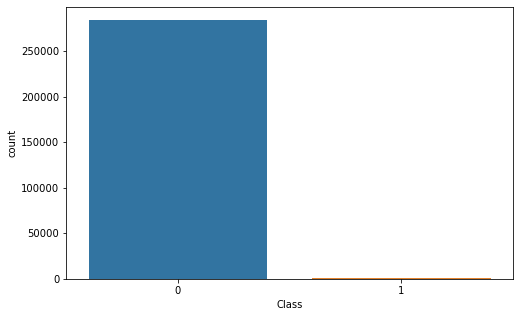

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Class", data=df)

### Data Cleaning
Check Missing Values and Outliers

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.isnull().sum().any()

False

In [10]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [11]:
df[df.Class == 1].duplicated().value_counts()

False    473
True      19
dtype: int64

In [12]:
df[df.Class == 0].duplicated().value_counts()

False    283253
True       1062
dtype: int64

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().value_counts()

False    283726
dtype: int64

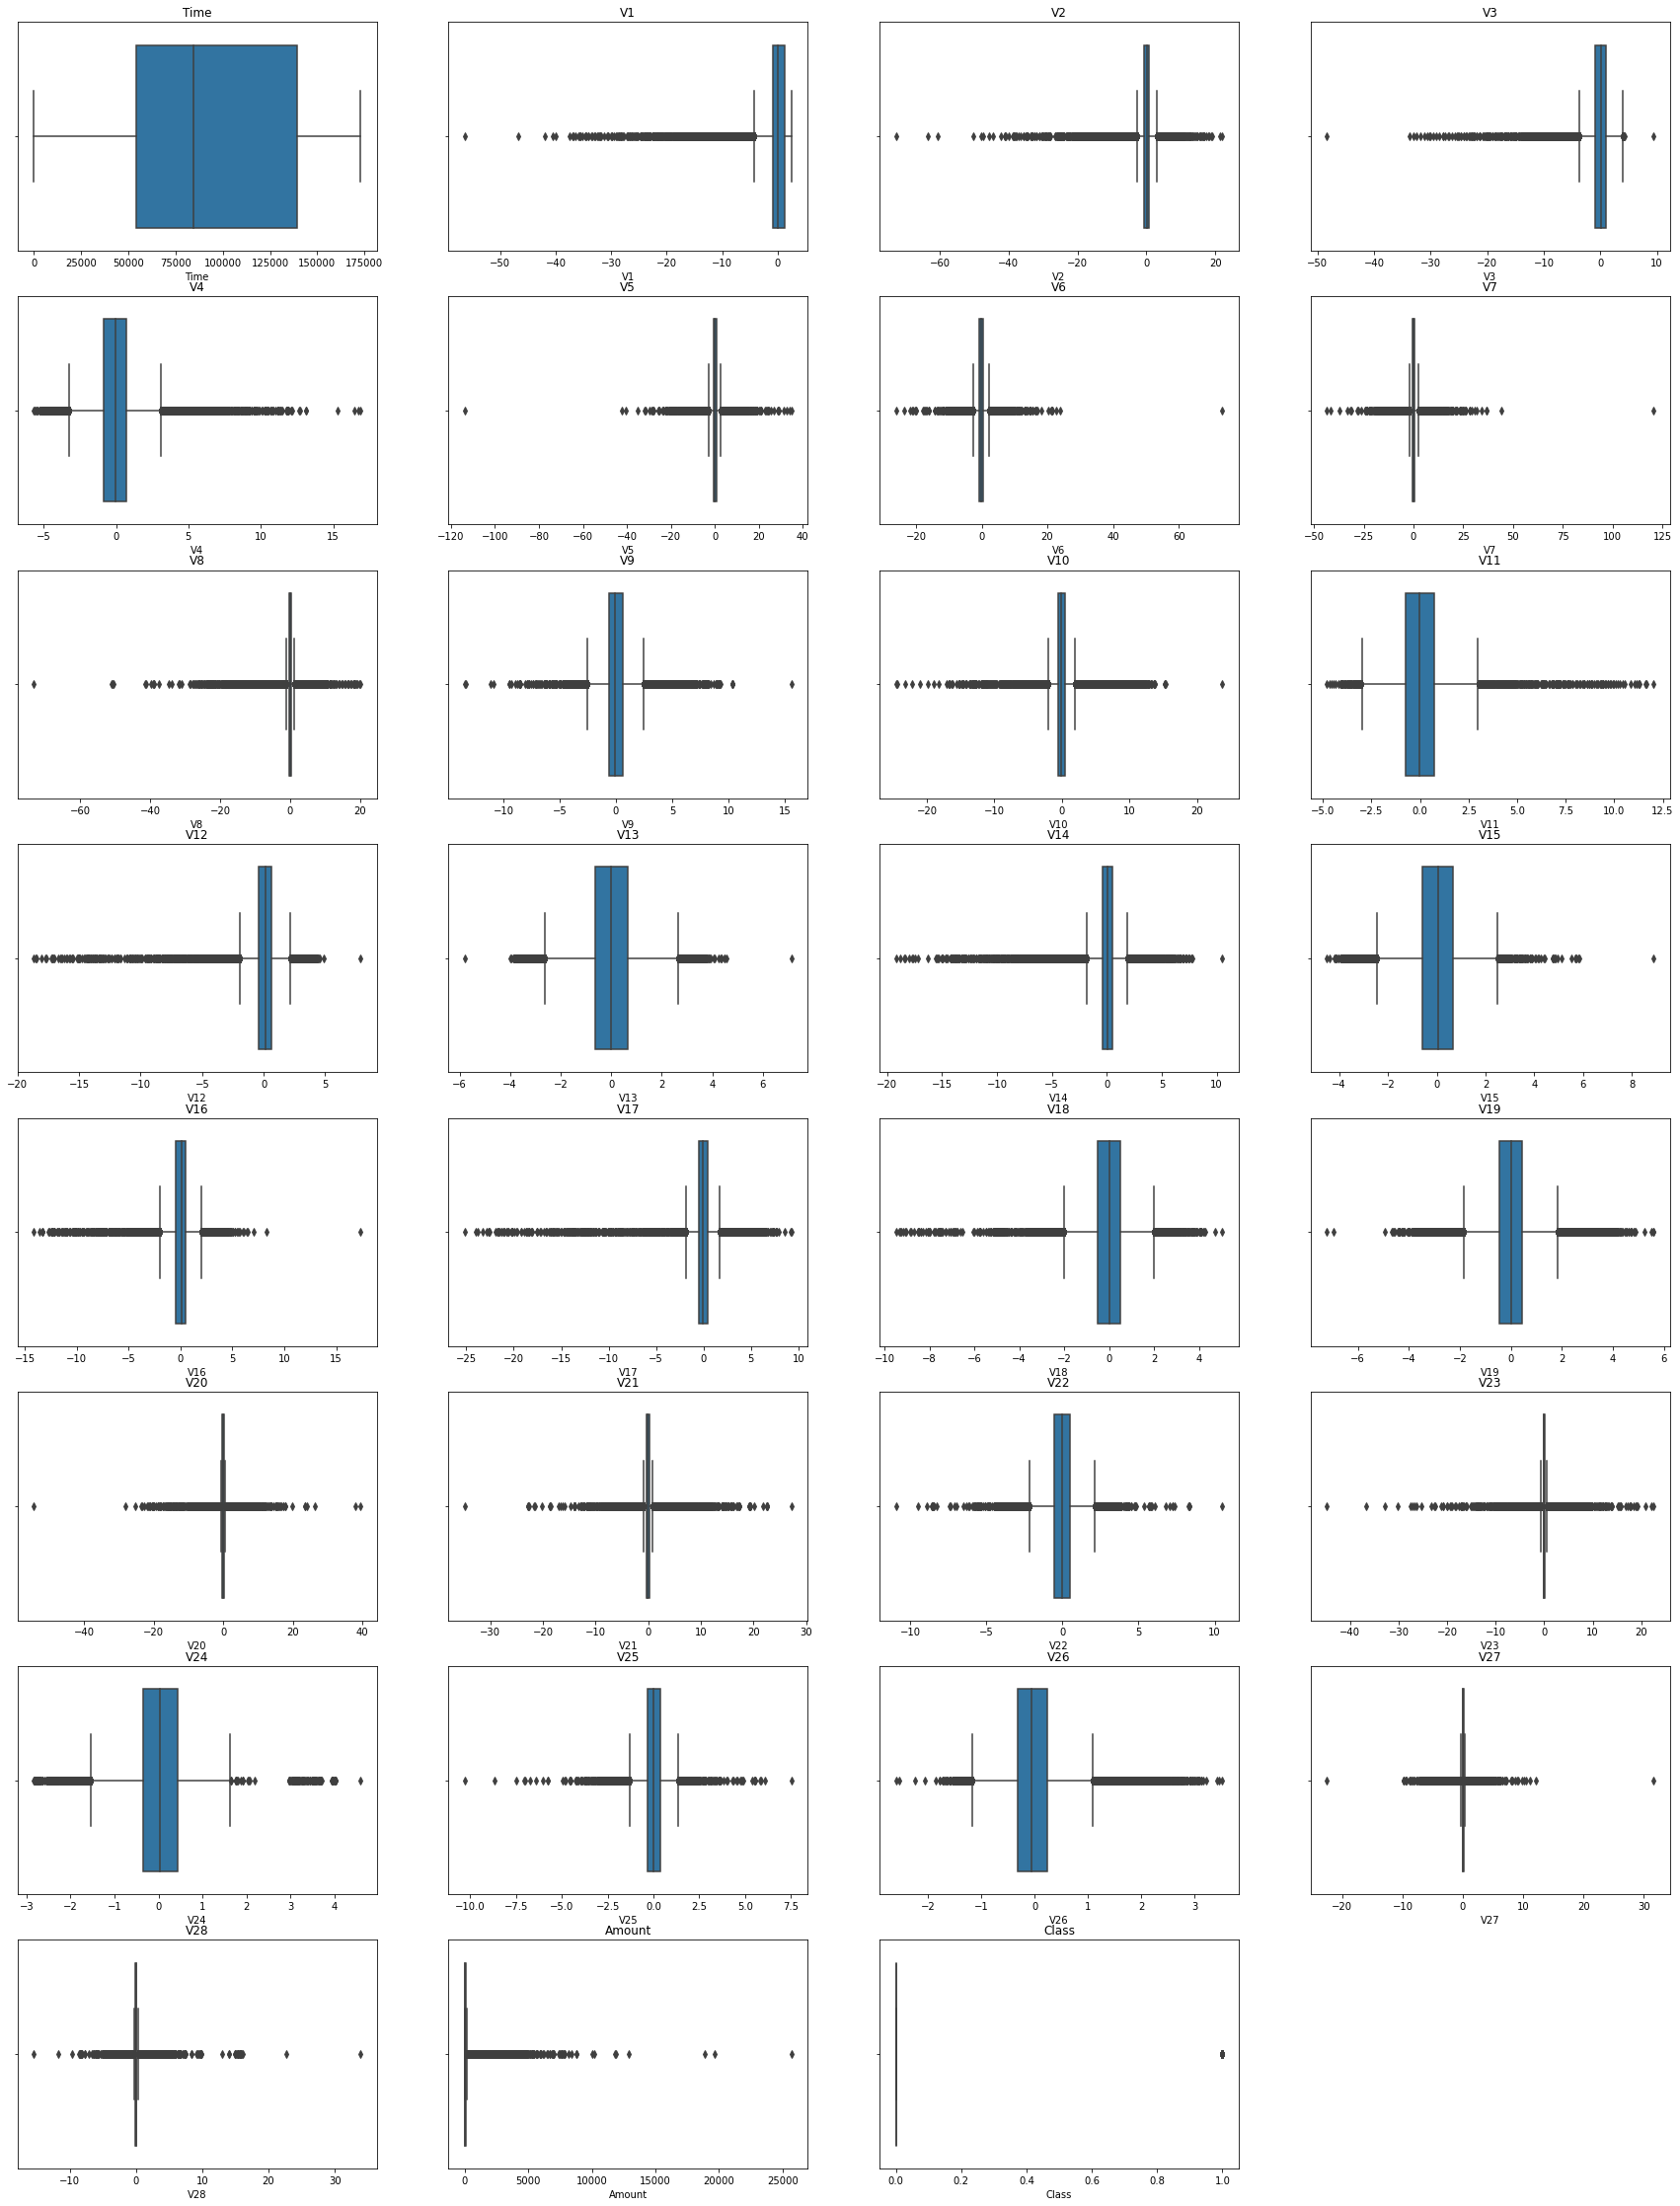

In [15]:
plt.figure(figsize=(30,40))
for i in range(len(df.columns)):    
    plt.subplot(8,4,i+1)
    sns.boxplot(df.iloc[:,i])
    plt.title(df.columns[i]);

In [ ]:
# plt.figure(figsize=(30,40))
# for i in range(len(df.columns)):
    # plt.title(df.columns[i])    
    # plt.subplot(8,4,i+1)
    # sns.boxplot(df.iloc[:,i]);

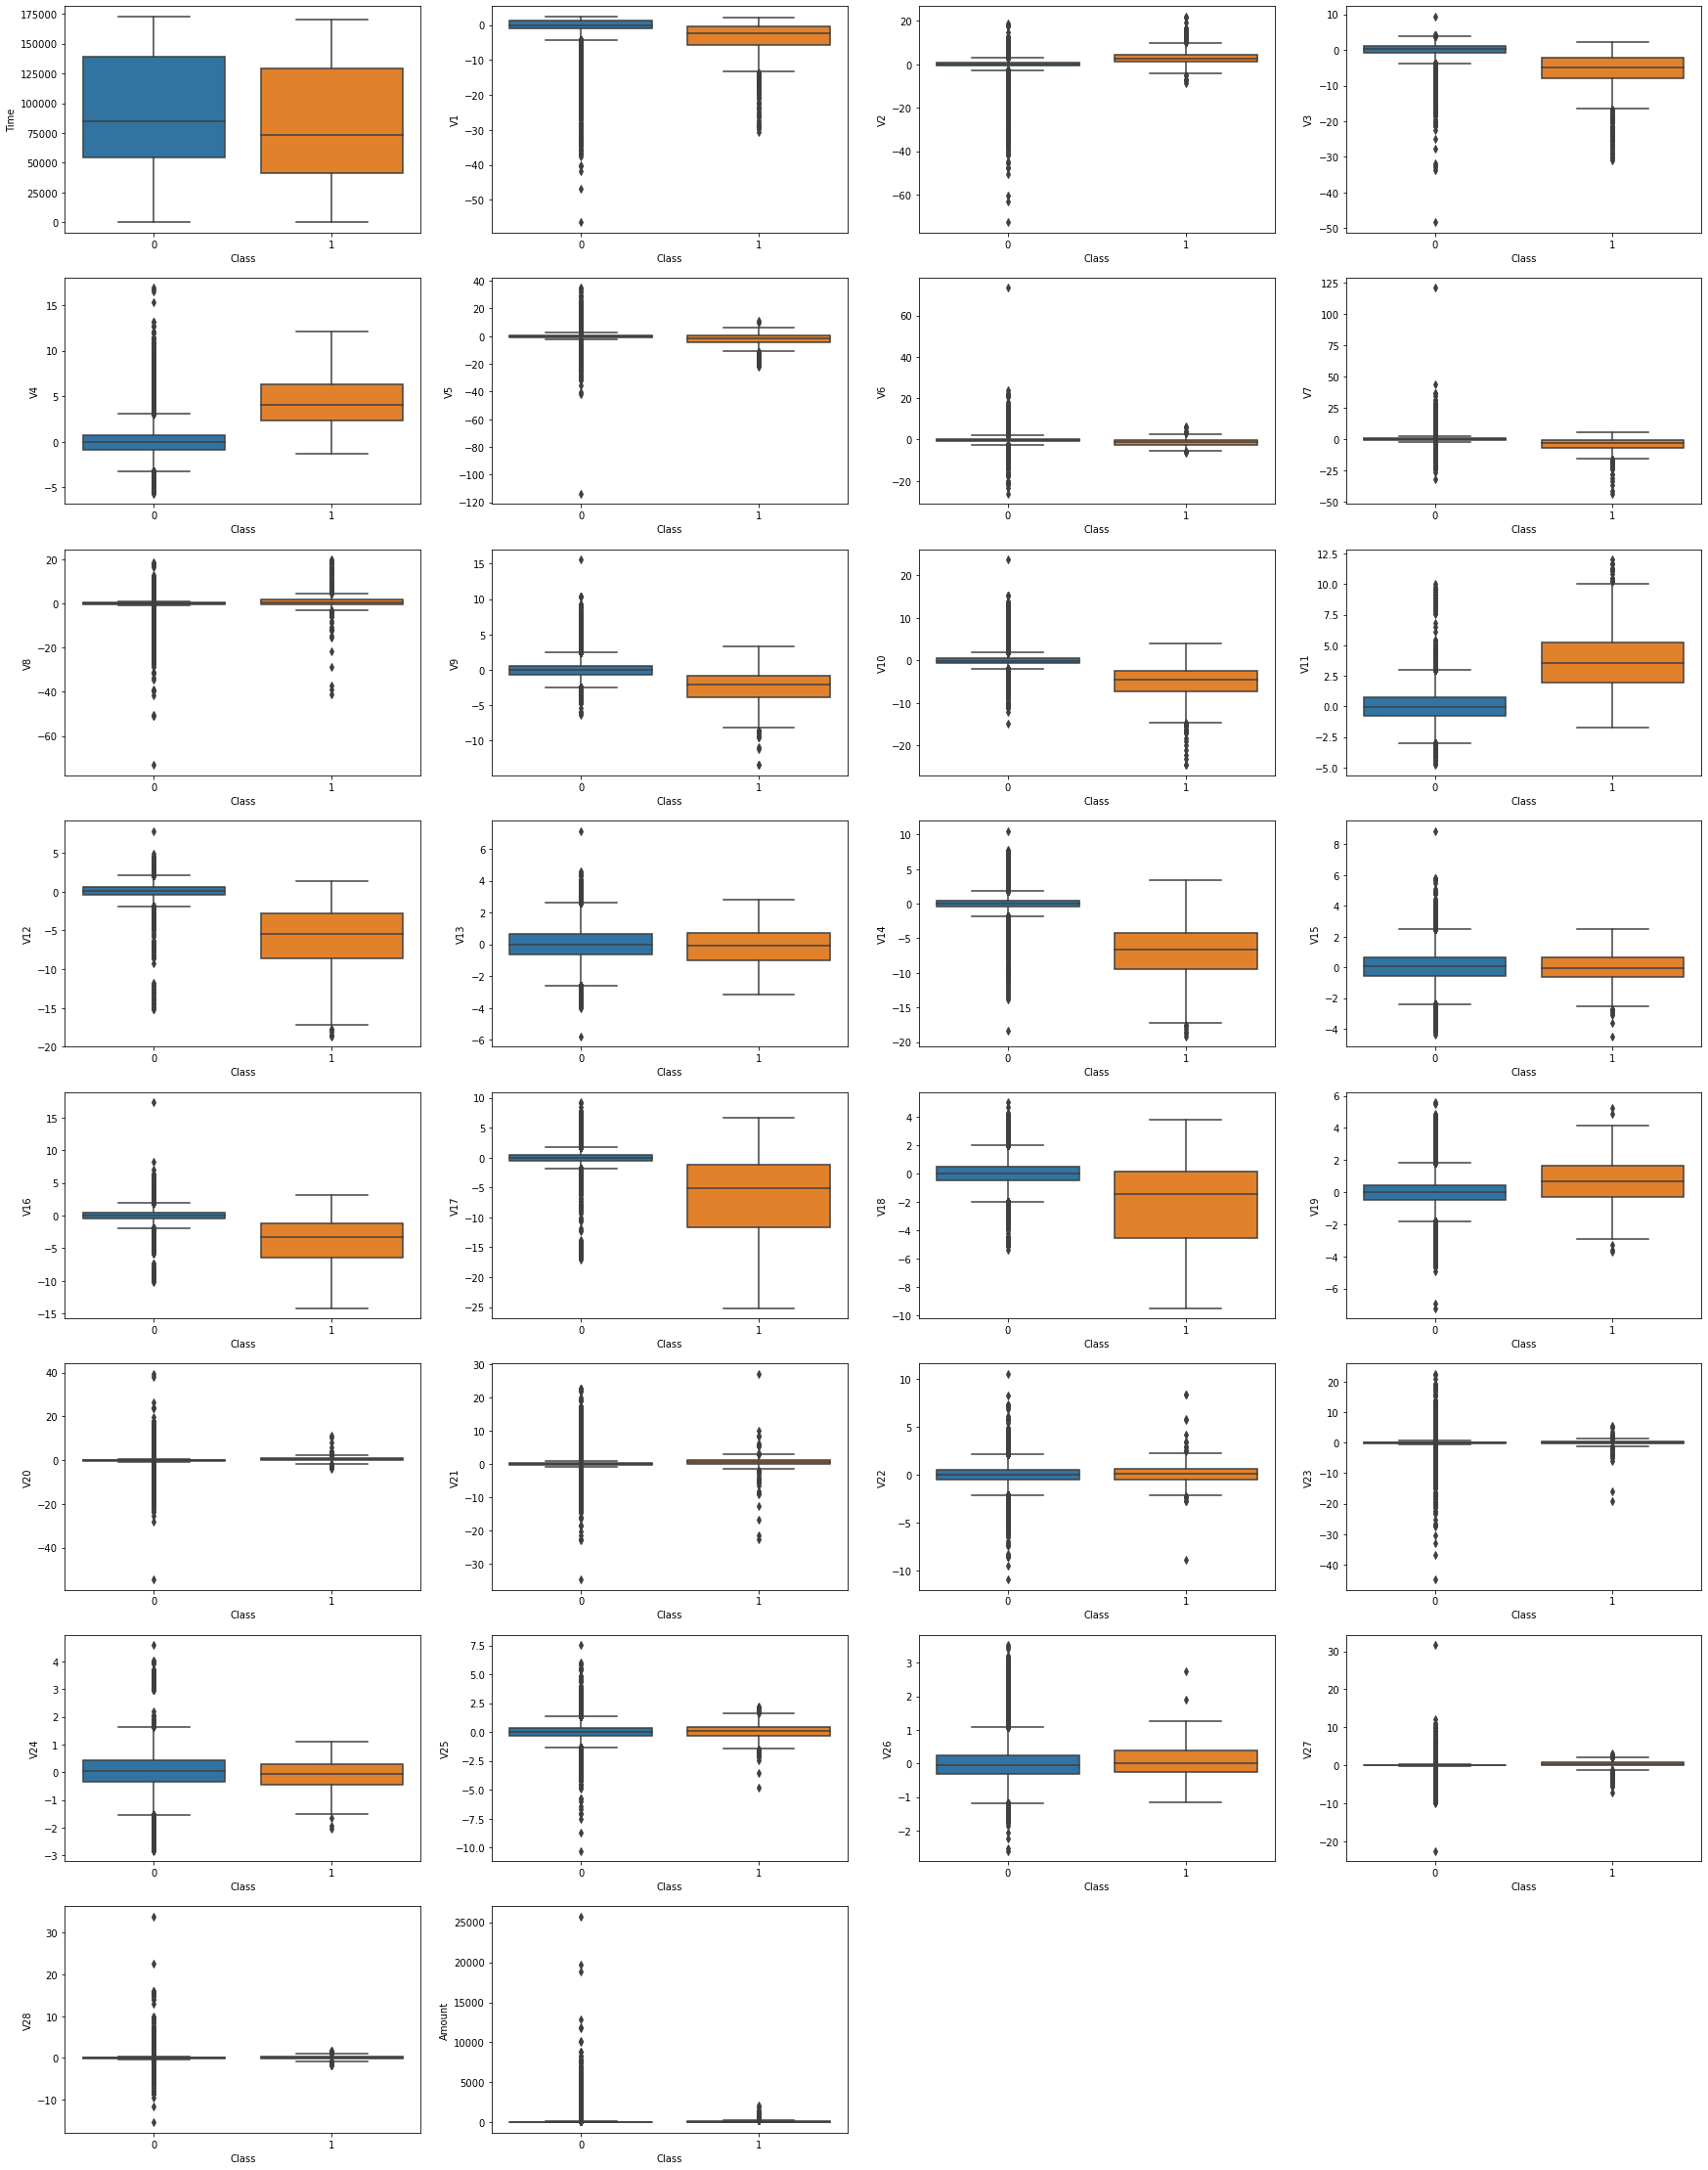

In [16]:
index = 0
plt.figure(figsize=(30,40))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x='Class',y=feature,data=df)

In [17]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<AxesSubplot:>

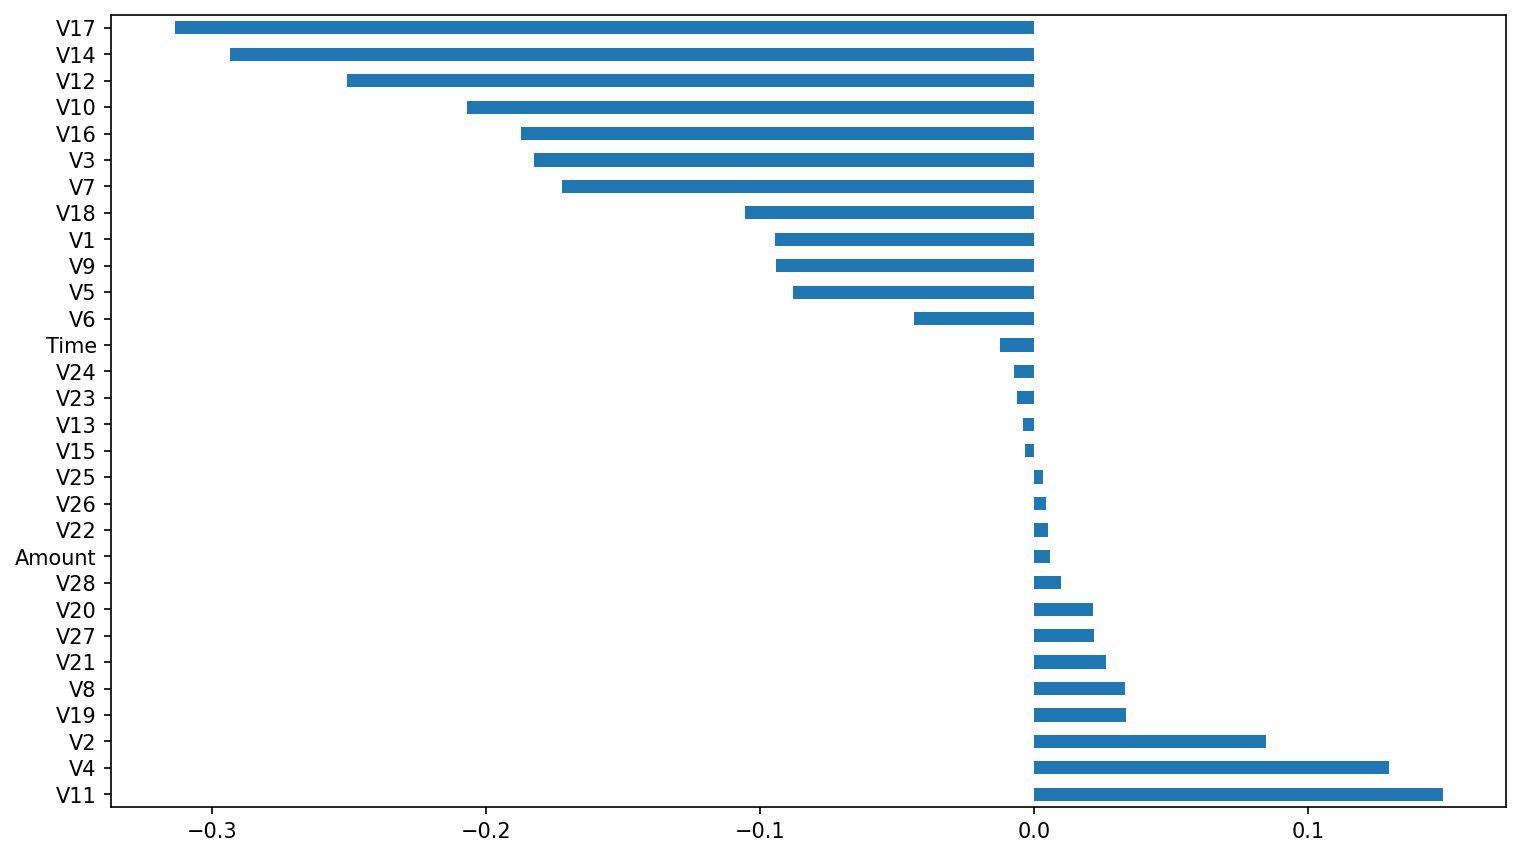

In [18]:
plt.figure(figsize=(12,7), dpi=150)
df.corr().drop("Class")["Class"].sort_values(ascending=False).plot(kind="barh")

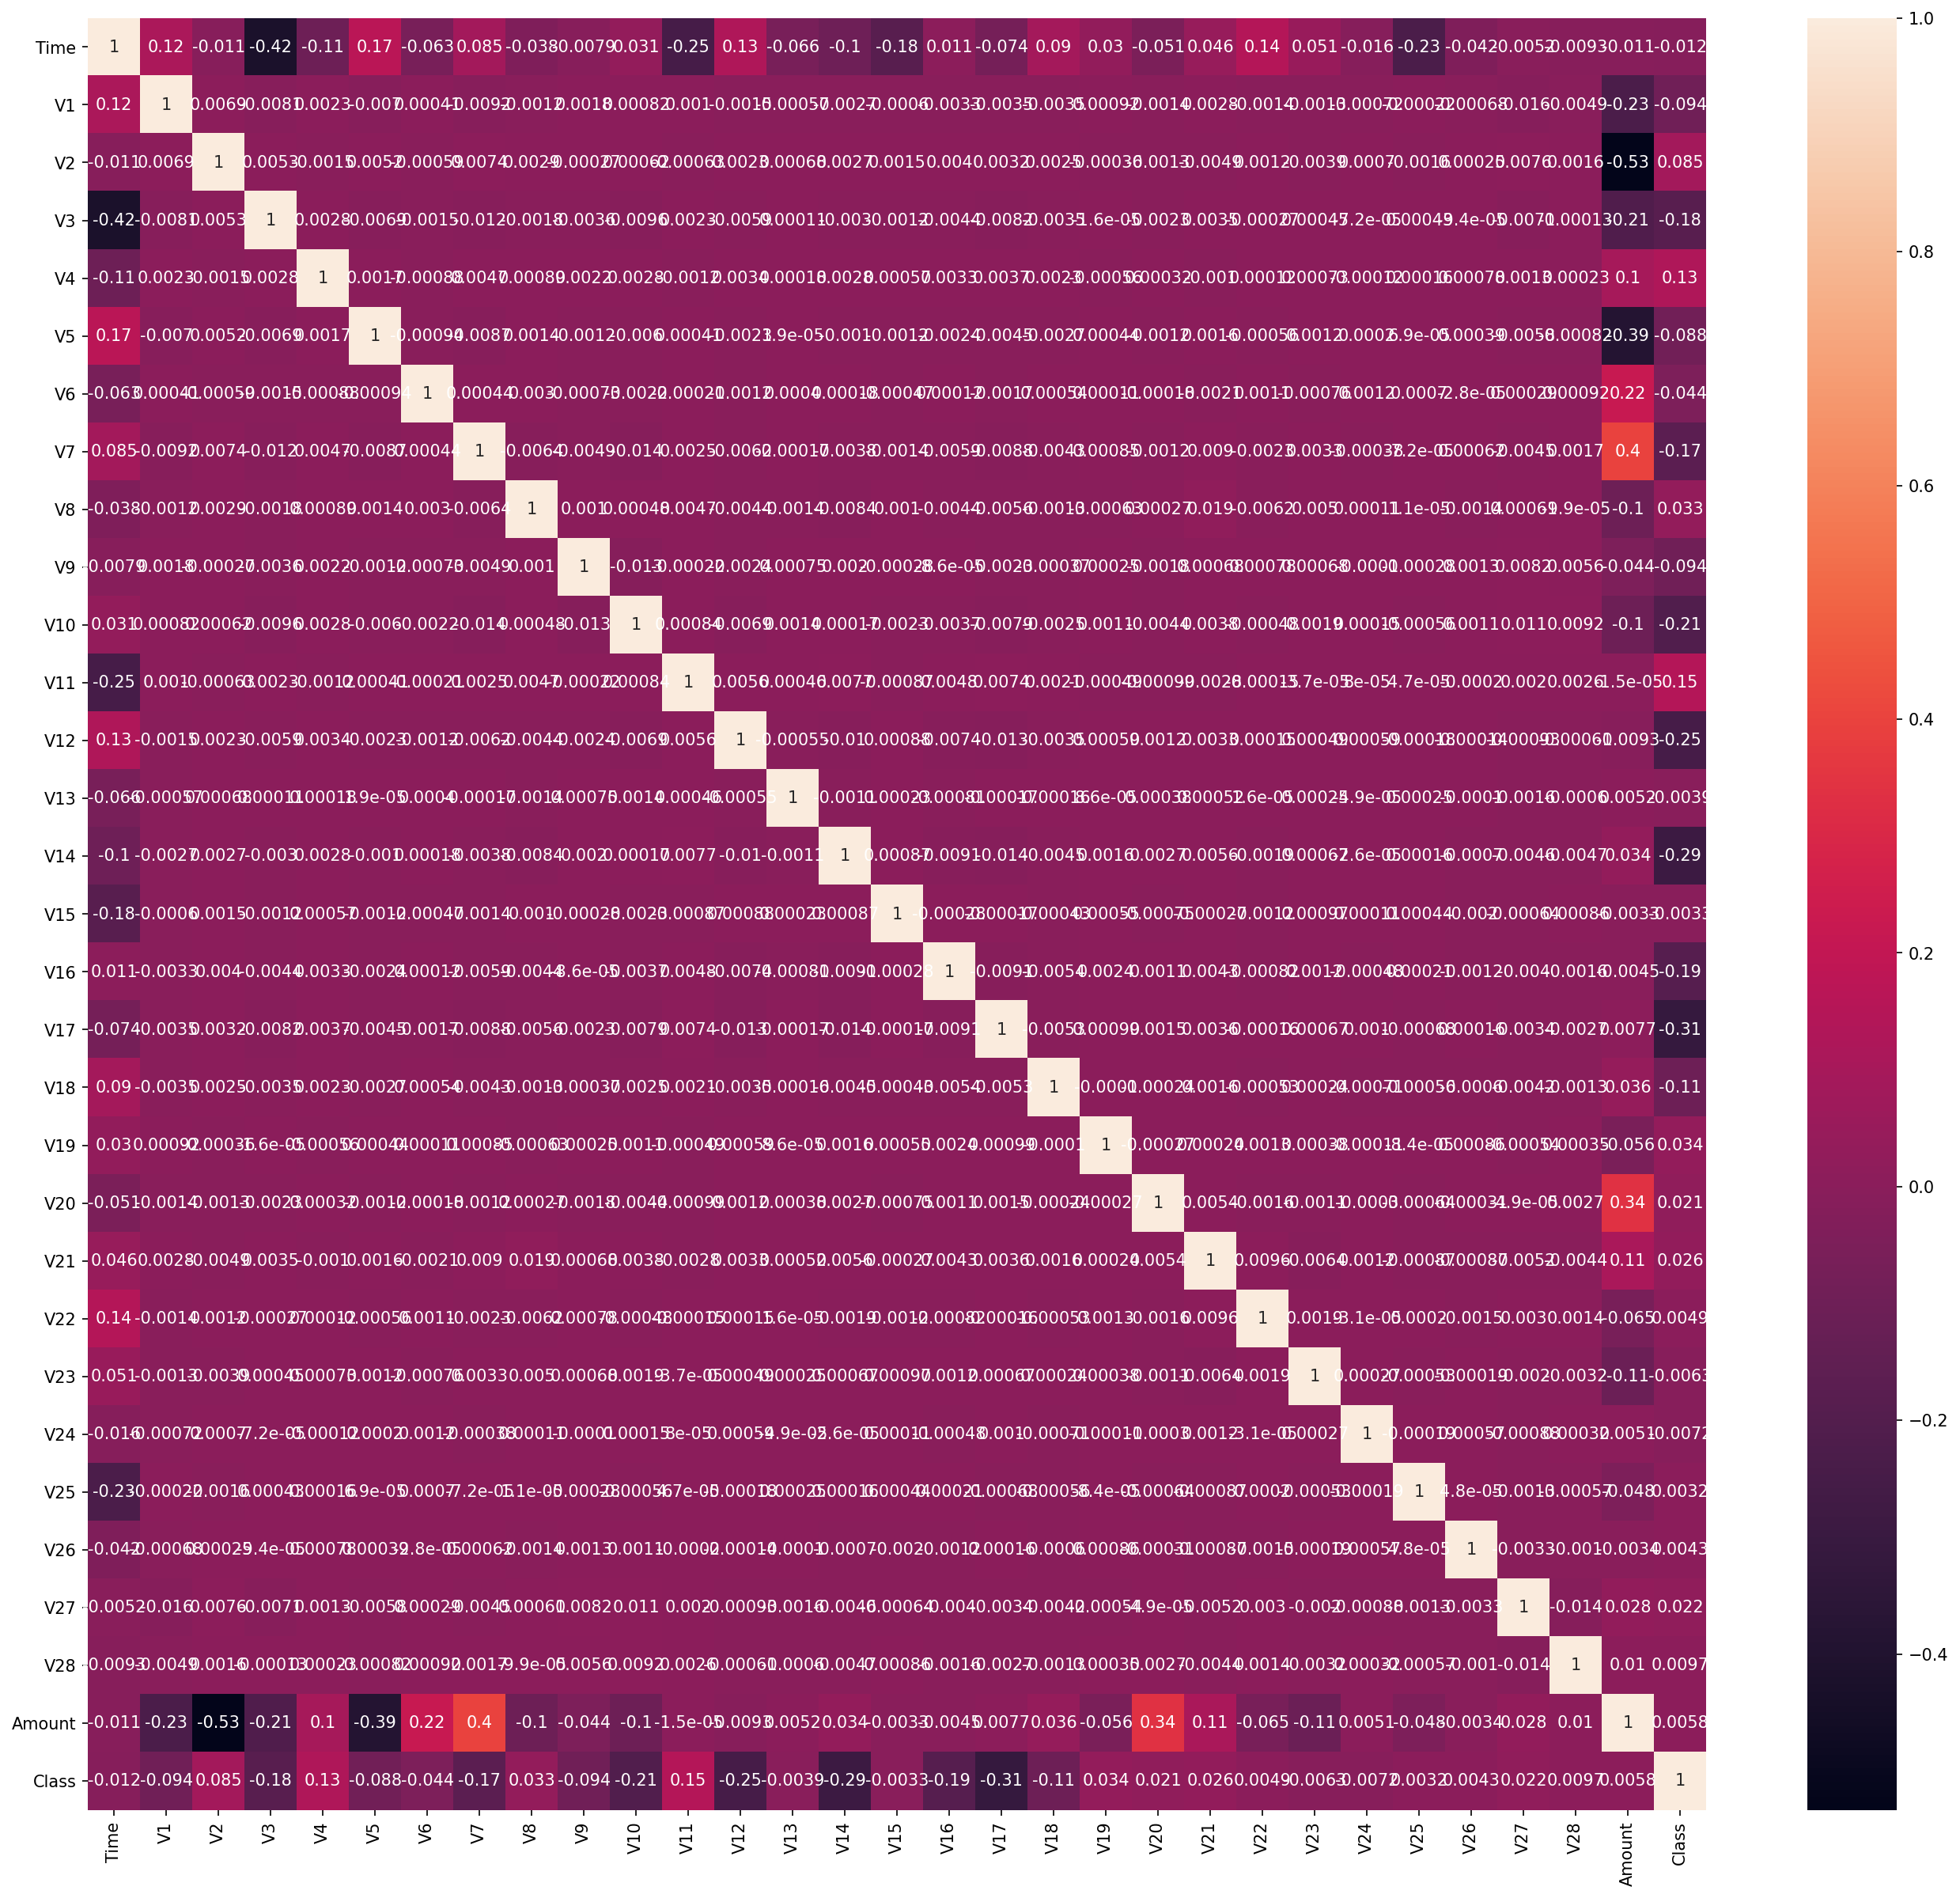

In [19]:
plt.figure(figsize=(22,20), dpi=150)
sns.heatmap(df.corr(), annot=True)
plt.tight_layout;

---
---


## 2. Data Preprocessing

#### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [21]:
X = df.drop("Class", axis=1)
y = df.Class

In [22]:
scaler = RobustScaler()

In [ ]:
# X_scaled = scaler.fit_transform(X)

In [ ]:
# X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
y_train.value_counts()

0    198277
1       331
Name: Class, dtype: int64

In [26]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [27]:
X_train_scale = pd.DataFrame(X_train_scale, index = X_train.index, columns = X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, index = X_test.index, columns = X_test.columns)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve

***ii. Model Training***

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_scale, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [30]:
y_pred=log_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84961    15]
 [   61    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [31]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

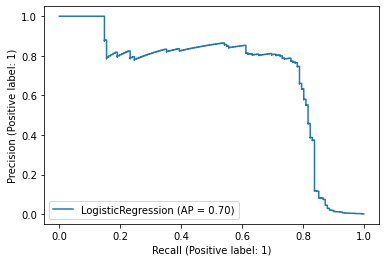

In [32]:
plot_precision_recall_curve(log_model, X_test_scale, y_test);

***v. Apply and Plot StratifiedKFold***

In [33]:
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def SKFold(n, model, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        #sm = SMOTE(random_state=42)
        #X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        #X_train = X_smoted
        #y_train = y_smoted
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(model.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred, pos_label=1))
        recall.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    
    print(f'Accuracy : {accuracy} \n')
    print(f'Precision : {precision} \n')
    print(f'Recall : {recall} \n')
    print(f'F1_score 1: {f1_scores} \n')       
 
    print(f'Accuracy : %{np.mean(accuracy)*100:.2f} std %{np.std(accuracy)*100:.2f} \n')
    print(f'Precision : %{np.mean(precision)*100:.2f} std %{np.std(precision)*100:.2f} \n')
    print(f'Recall : %{np.mean(recall)*100:.2f} std %{np.std(recall)*100:.2f}\n')
    print(f'F1_score : %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

In [34]:
SKFold(10, LogisticRegression(), X, y)

Accuracy : [0.9992246149508336, 0.9993303492757198, 0.999365594050682, 0.9989074119761745, 0.999048391076023, 0.9991893701758714, 0.9991893416043987, 0.9992245876215987, 0.9993303256731989, 0.9989426194839983] 

Precision : [0.8571428571428571, 0.9375, 0.9142857142857143, 0.8148148148148148, 0.7837837837837838, 0.9032258064516129, 0.9, 0.8205128205128205, 0.9375, 0.7741935483870968] 

Recall : [0.6382978723404256, 0.6382978723404256, 0.6808510638297872, 0.4583333333333333, 0.6041666666666666, 0.5833333333333334, 0.574468085106383, 0.6808510638297872, 0.6382978723404256, 0.5106382978723404] 

F1_score 1: [0.7317073170731707, 0.759493670886076, 0.7804878048780487, 0.5866666666666666, 0.6823529411764706, 0.7088607594936709, 0.7012987012987012, 0.7441860465116279, 0.759493670886076, 0.6153846153846153] 

Accuracy : %99.92 std %0.02 

Precision : %86.43 std %5.92 

Recall : %60.08 std %6.82

F1_score : %70.70 std  %6.04


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [ ]:
# !pip install imblearn

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
y_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [37]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [38]:
scaler = RobustScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

***ii. Model Training***

In [39]:
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [40]:
y_pred_smote=log_model.predict(X_test_smote)
print(confusion_matrix(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote,y_pred_smote))

[[84118   762]
 [ 2755 82317]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     84880
           1       0.99      0.97      0.98     85072

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952



In [41]:
# Not apply smote to data
y_pred=log_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[19253 65723]
 [    2   140]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37     84976
           1       0.00      0.99      0.00       142

    accuracy                           0.23     85118
   macro avg       0.50      0.61      0.19     85118
weighted avg       1.00      0.23      0.37     85118



***iv.  Plot Precision and Recall Curve***


In [42]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

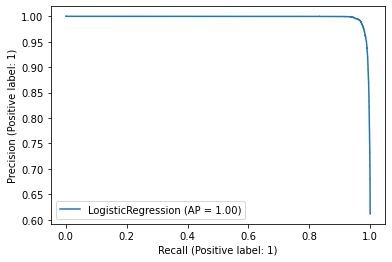

In [43]:
plot_precision_recall_curve(log_model, X_test_smote, y_test_smote);

***v. Apply and Plot StratifiedKFold***

In [44]:
SKFold(10, LogisticRegression(), X_smote, y_smote)

Accuracy : [0.9781998552540997, 0.9788882808776544, 0.9794178390496197, 0.9788000211823269, 0.9797708778309298, 0.9789412366948509, 0.9788879082082965, 0.9788526037069727, 0.9784466019417476, 0.9788526037069727] 

Precision : [0.9904410167282207, 0.9915564413843088, 0.9908193877182203, 0.9904176459952992, 0.9905428818943113, 0.9905268105723687, 0.9907383958612207, 0.9909153425748308, 0.9906234161175874, 0.9905247549817366] 

Recall : [0.9657193292144749, 0.9660017652250662, 0.9678022947925861, 0.9669561533573395, 0.9687919226152651, 0.9671326696321401, 0.9668137687555163, 0.9665666372462489, 0.9660370697263901, 0.966954986760812] 

F1_score 1: [0.9779239583147132, 0.9786123032904148, 0.9791755965137877, 0.9785462924920956, 0.9795466714260218, 0.9786899594519766, 0.9786298824286174, 0.9785895557064731, 0.9781757734999196, 0.9785979705588109] 

Accuracy : %97.89 std %0.04 

Precision : %99.07 std %0.03 

Recall : %96.69 std %0.09

F1_score : %97.86 std  %0.04


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [45]:
from sklearn.ensemble import RandomForestClassifier

#### Without Smote

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scale, y_train)

RandomForestClassifier()

In [47]:
y_pred = rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84971     5]
 [   34   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.76      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



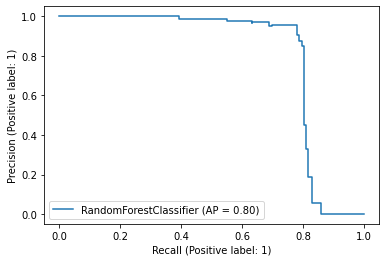

In [48]:
plot_precision_recall_curve(rf_model, X_test_scale, y_test);

#### Feature Importance

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_model, labels=X.columns, relative = False)
visualizer = RadViz(size=(600, 400))
viz.fit(X_train_scale, y_train)
viz.show()

In [ ]:
feats = pd.DataFrame(index=X.columns, data= rf_model.feature_importances_, columns=['Importance'])
feats

In [ ]:
imp_feats = feats.sort_values("Importance")

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

#### With Smote

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

***ii. Prediction and Model Evaluating***

In [50]:
y_pred_smote=rf_model.predict(X_test_smote)
print(confusion_matrix(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote,y_pred_smote))

[[84860    20]
 [    0 85072]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [51]:
# Not apply smote to data
y_pred=rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[82942  2034]
 [   37   105]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.05      0.74      0.09       142

    accuracy                           0.98     85118
   macro avg       0.52      0.86      0.54     85118
weighted avg       1.00      0.98      0.99     85118



***iii. Plot Precision and Recall Curve***


In [52]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

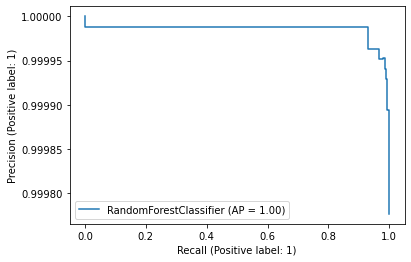

In [53]:
plot_precision_recall_curve(rf_model, X_test_smote, y_test_smote);

***iv. Apply and Plot StratifiedKFold***

In [ ]:
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def SKFold(n, model, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        #sm = SMOTE(random_state=42)
        #X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        #X_train = X_smoted
        #y_train = y_smoted
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(model.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred, pos_label=1))
        recall.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    
    print(f'Accuracy : {accuracy} \n')
    print(f'Precision : {precision} \n')
    print(f'Recall : {recall} \n')
    print(f'F1_score 1: {f1_scores} \n') 
        
 
    print(f'Accuracy : %{np.mean(accuracy)*100:.2f} std %{np.std(accuracy)*100:.2f} \n')
    print(f'Precision : %{np.mean(precision)*100:.2f} std %{np.std(precision)*100:.2f} \n')
    print(f'Recall : %{np.mean(recall)*100:.2f} std %{np.std(recall)*100:.2f}\n')
    print(f'F1_score : %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

In [ ]:
SKFold(10, RandomForestClassifier(), X_smote, y_smote)

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

***ii. Define Model***

In [61]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))

# opt = Adam(learning_rate=0.001)
early_stop = EarlyStopping(monitor="val_loss", verbose =2, patience = 10, restore_best_weights=True)

***iii. Compile Model***

In [62]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy"])

***iv. Fit Model***

#### Without Smote

In [63]:
model.fit(x=X_train_scale.values, 
          y=y_train.values, 
          batch_size = 512,
          epochs=300,
          validation_data=(X_test_scale.values, y_test.values), verbose=1, callbacks = [early_stop])

Epoch 1/300
388/388 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8608 - val_loss: 0.0902 - val_accuracy: 0.9985
Epoch 2/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9966 - val_loss: 0.0170 - val_accuracy: 0.9988
Epoch 3/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0190 - accuracy: 0.9981 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 4/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9986 - val_loss: 0.0074 - val_accuracy: 0.9989
Epoch 5/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9987 - val_loss: 0.0065 - val_accuracy: 0.9990
Epoch 6/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0079 - accuracy: 0.9989 - val_loss: 0.0062 - val_accuracy: 0.9990
Epoch 7/300
388/388 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 0.0058 - val_accuracy: 0.9990

In [65]:
y_pred = model.predict_classes(X_test_scale.values)
print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values, y_pred))

[[84961    15]
 [   34   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.76      0.82       142

    accuracy                           1.00     85118
   macro avg       0.94      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118



#### With Smote

In [ ]:
X_train_smote # array seklinde olmalı

In [ ]:
y_train_smote.values # array seklinde olmalı

In [66]:
model.fit(x=X_train_smote, 
          y=y_train_smote.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test_smote, y_test_smote.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
775/775 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9490 - val_loss: 0.0406 - val_accuracy: 0.9861
Epoch 2/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9802 - val_loss: 0.0287 - val_accuracy: 0.9889
Epoch 3/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9837 - val_loss: 0.0226 - val_accuracy: 0.9908
Epoch 4/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9857 - val_loss: 0.0197 - val_accuracy: 0.9918
Epoch 5/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9874 - val_loss: 0.0163 - val_accuracy: 0.9937
Epoch 6/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9883 - val_loss: 0.0168 - val_accuracy: 0.9931
Epoch 7/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9895 - val_loss: 0.0157 - val_accuracy: 0.9939

Epoch 58/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 59/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9939 - val_loss: 0.0061 - val_accuracy: 0.9988
Epoch 60/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0059 - val_accuracy: 0.9988
Epoch 61/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0054 - val_accuracy: 0.9989
Epoch 62/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0058 - val_accuracy: 0.9988
Epoch 63/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0061 - val_accuracy: 0.9989
Epoch 64/100
775/775 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0056 - val_accuracy:

***v. Prediction and Model Evaluating***

In [68]:
y_pred_smote = model.predict_classes(X_test_smote)
print(confusion_matrix(y_test_smote.values,y_pred_smote))
print(classification_report(y_test_smote.values, y_pred_smote))

[[84774   106]
 [   73 84999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [70]:
# Not apply smote to data
y_pred = model.predict_classes(X_test_scale.values)
print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values, y_pred))

[[59113 25863]
 [    6   136]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.70     85118
   macro avg       0.50      0.83      0.42     85118
weighted avg       1.00      0.70      0.82     85118



***vi. Plot Precision and Recall Curve***

In [ ]:
# plot_precision_recall_curve(model, X_test_scale.values, y_test.values);

#### Final Model

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scale, y_train)

RandomForestClassifier()

In [73]:
y_pred = rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84972     4]
 [   31   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.97      0.78      0.86       142

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118



#### Cross Validate

In [74]:
from sklearn.model_selection import cross_val_score, cross_validate

In [75]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
rf_model = RandomForestClassifier()
scores = cross_validate(estimator = rf_model, X = X_train_scale, y = y_train, cv = 10, scoring = ['accuracy', 'precision','recall','f1'])

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[20, 50],
             'max_features':[5, 6],
             'max_depth':[8,10],
             'min_samples_split':[3,4]
             } 

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
grid_rf_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring = "f1", n_jobs=-1, verbose=1)

In [ ]:
grid_rf_model.fit(X_train_scale, y_train)

In [ ]:
grid_rf_model.best_params_

In [ ]:
y_pred = grid_rf_model.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [ ]:
import pickle

In [76]:
scaler = RobustScaler()

In [77]:
X_scale = scaler.fit_transform(X)

In [78]:
rf_model = RandomForestClassifier()

In [79]:
rf_model.fit(X_scale, y)

RandomForestClassifier()

In [81]:
pickle.dump(rf_model, open("rf_final_model.pkl", 'wb'))

<IPython.core.display.Javascript object>

In [82]:
X = df.drop("Class", axis=1)
y = df.Class

In [99]:
scaler = RobustScaler().fit(X)

In [100]:
pickle.dump(scaler, open("scaler.pkl", 'wb'))

<IPython.core.display.Javascript object>

### Save and Export Variables as .pkl

In [85]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [86]:
list(X.columns)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [87]:
pickle.dump(list(X.columns), open("Xcolums.pkl","wb"))

<IPython.core.display.Javascript object>

### Final Model Test

In [ ]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [1]:
rf = pickle.load(open("rf_final_model.pkl", "rb"))

<IPython.core.display.Javascript object>

In [2]:
scaler = pickle.load(open("scaler.pkl", "rb"))

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("creditcard.csv")

<IPython.core.display.Javascript object>

In [4]:
X = df.drop("Class", axis=1)
y = df.Class

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
X_test = scaler.transform(X_test)

In [11]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[85295     0]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.82      0.90       148

    accuracy                           1.00     85443
   macro avg       1.00      0.91      0.95     85443
weighted avg       1.00      1.00      1.00     85443



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___